In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sumber data : https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
        
About Dataset
The below column reference:

1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

Berikut merupkan dtaset yang saya gunkan dalam proses klasifikasi binary. pada kasus ini saya menggunakan dataset menegenai penipuan pembayaran online. tujuan utamanya ada mendeteksi apakah suatu pembayaran yang dilakukan merupakan penipuan atau tidak. disini terdapat 10 variable dengan keterangan seperti di atas dan terdapat 600000 lebih data.

## IMPORT DATASET

In [4]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362620 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe(include='all')

step      type        amount     nameOrig  oldbalanceOrg  \
count   6.362620e+06   6362620  6.362620e+06      6362620   6.362620e+06   
unique           NaN         5           NaN      6353307            NaN   
top              NaN  CASH_OUT           NaN  C2098525306            NaN   
freq             NaN   2237500           NaN            3            NaN   
mean    2.433972e+02       NaN  1.798619e+05          NaN   8.338831e+05   
std     1.423320e+02       NaN  6.038582e+05          NaN   2.888243e+06   
min     1.000000e+00       NaN  0.000000e+00          NaN   0.000000e+00   
25%     1.560000e+02       NaN  1.338957e+04          NaN   0.000000e+00   
50%     2.390000e+02       NaN  7.487194e+04          NaN   1.420800e+04   
75%     3.350000e+02       NaN  2.087215e+05          NaN   1.073152e+05   
max     7.430000e+02       NaN  9.244552e+07          NaN   5.958504e+07   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
count     6.362620e+06      6362620    6.362620e+06    6.362620e+06   
unique             NaN      2722362             NaN             NaN   
top                NaN  C1286084959             NaN             NaN   
freq               NaN          113             NaN             NaN   
mean      8.551137e+05          NaN    1.100702e+06    1.224996e+06   
std       2.924049e+06          NaN    3.399180e+06    3.674129e+06   
min       0.000000e+00          NaN    0.000000e+00    0.000000e+00   
25%       0.000000e+00          NaN    0.000000e+00    0.000000e+00   
50%       0.000000e+00          NaN    1.327057e+05    2.146614e+05   
75%       1.442584e+05          NaN    9.430367e+05    1.111909e+06   
max       4.958504e+07          NaN    3.560159e+08    3.561793e+08   

             isFraud  isFlaggedFraud  
count   6.362620e+06    6.362620e+06  
unique           NaN             NaN  
top              NaN             NaN  
freq             NaN             NaN  
mean    1.290820e-03    2.514687e-06  
std     3.590480e-02    1.585775e-03  
min     0.000000e+00    0.000000e+00  
25%     0.000000e+00    0.000000e+00  
50%     0.000000e+00    0.000000e+00  
75%     0.000000e+00    0.000000e+00  
max     1.000000e+00    1.000000e+00

## DATA PRERPOCESSING

### Delete Useless features

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.duplicated(subset=None, keep='first').sum()

0

Intepretasi : bedasarkan hasil pengecekan missing value dan duplikasi data, hasil menunjukan bahwa tidak ada data yang hilang dan tidak terjadi duplikasi dalam data

In [9]:
del df["isFlaggedFraud"]

In [10]:
del df["nameDest"]

In [11]:
del df["nameOrig"]

Intepretasi : selanjutnya, syntax dia atas syaa menghilangakan 3 variable yang tidak digunkan. variable "isFlaggedFraud" tidak digunakan karena tidak terdapat keterangan mengenai variable tersebut. variable "nameDest" tidak digunkan karena nama pengirim tidak penting untuk dimasukan ke model klasifikasi begitu pula untuk variable "nameOrig" yang merupakn identitas rekening asal

## Encode catagorical data

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["type"] = label_encoder.fit_transform(df["type"])

### Handling Imbalanced target variable

In [13]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

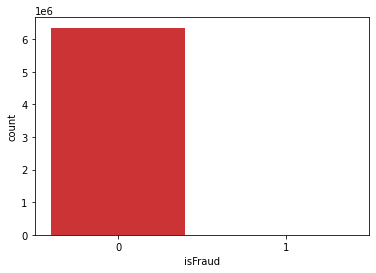

In [14]:
sns.countplot(x= 'isFraud', data=df, palette="Set1")

In [15]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [16]:
from imblearn.combine import SMOTETomek

os_us = SMOTETomek(sampling_strategy=0.5,random_state = 27)

x_res, y_res = os_us.fit_resample(x,y)

In [17]:
x_res.shape,y_res.shape


((9530214, 7), (9530214,))

Intepretasi : selanjutnya saya melakukan pengecekan terhadap keseimbangan variabel target. dari pengujian didapatkan data tidak seimbang antara yang melakukan penipuan atau tidak dengan perbandinga yang cukup jauh, oleh karena itu saya menggunkaan teknik smotetomek untuk menyetarakn proporsi tersebut. 

### Split Data

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size = 0.7,random_state = 27)

## CLASSIFICATION USING LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix

matrix1 = confusion_matrix(y_test, y_pred1)
matrix1

array([[4241764,  206623],
       [ 335908, 1886855]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score

x1 = accuracy_score(y_test, y_pred1)
x1

0.918675041034904

In [22]:
matrix1 = confusion_matrix(y_test, y_pred1)
print(matrix1)

[[4241764  206623]
 [ 335908 1886855]]


<AxesSubplot:>

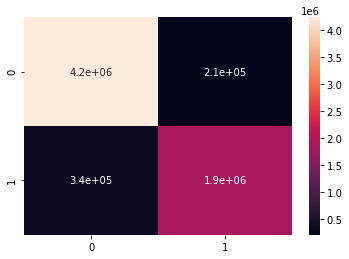

In [23]:
sns.heatmap(matrix1, annot=True)


Metode klasifikasi pertama adalah logistic regression. pada metode ini didapatkan akurasi model terhadapap pembagian antara data ajar dan data test sebanyak 70:30 adalah sebesar 91%. dengan angka akurasi sebesar itu sudah tergolong cukup baik. selanjutnya dari hasil confusion matrix didapatkan  hasil prediksi benar pada data fraud sebesar 1.8 juta prediksi dan untuk data yang prediksi benar terhadap orang yang tidak melakukan penipuan adalah 4.2 juta data. selanjutnya untuk data yang salah di prediksi pada golongan fraud sebanyak 335ribu dan sebaliknya 210 ribu 

## CLASSIFICATION USING NAIVE BAYES

In [24]:
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

In [25]:
x2 = accuracy_score(y_test, y_pred2)
x2

0.767757133327837

In [26]:
matrix2 = confusion_matrix(y_test, y_pred2)
print(matrix2)

[[4358974   89413]
 [1459914  762849]]


<AxesSubplot:>

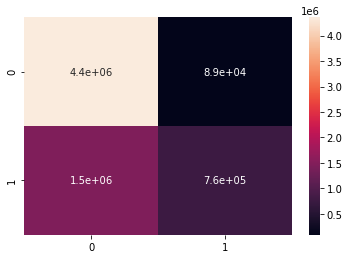

In [27]:
sns.heatmap(matrix2, annot=True)


Selanjutnya pengklasifikasian menggunakan naive bayes. akurasi model ini berukuran lebih kecil daripada logistic regression yaitu hanya sebesar 76%. angka korelasi ini tidak terlalu buruk tetapi juga tidak bisa dikatakna baik juga. banyak terjadi kesalahan predisksi pada data fraud yang diprediksi tidak fraud,

## CLASSIFICATION USING DECISION TREE

In [28]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)


DecisionTreeClassifier()

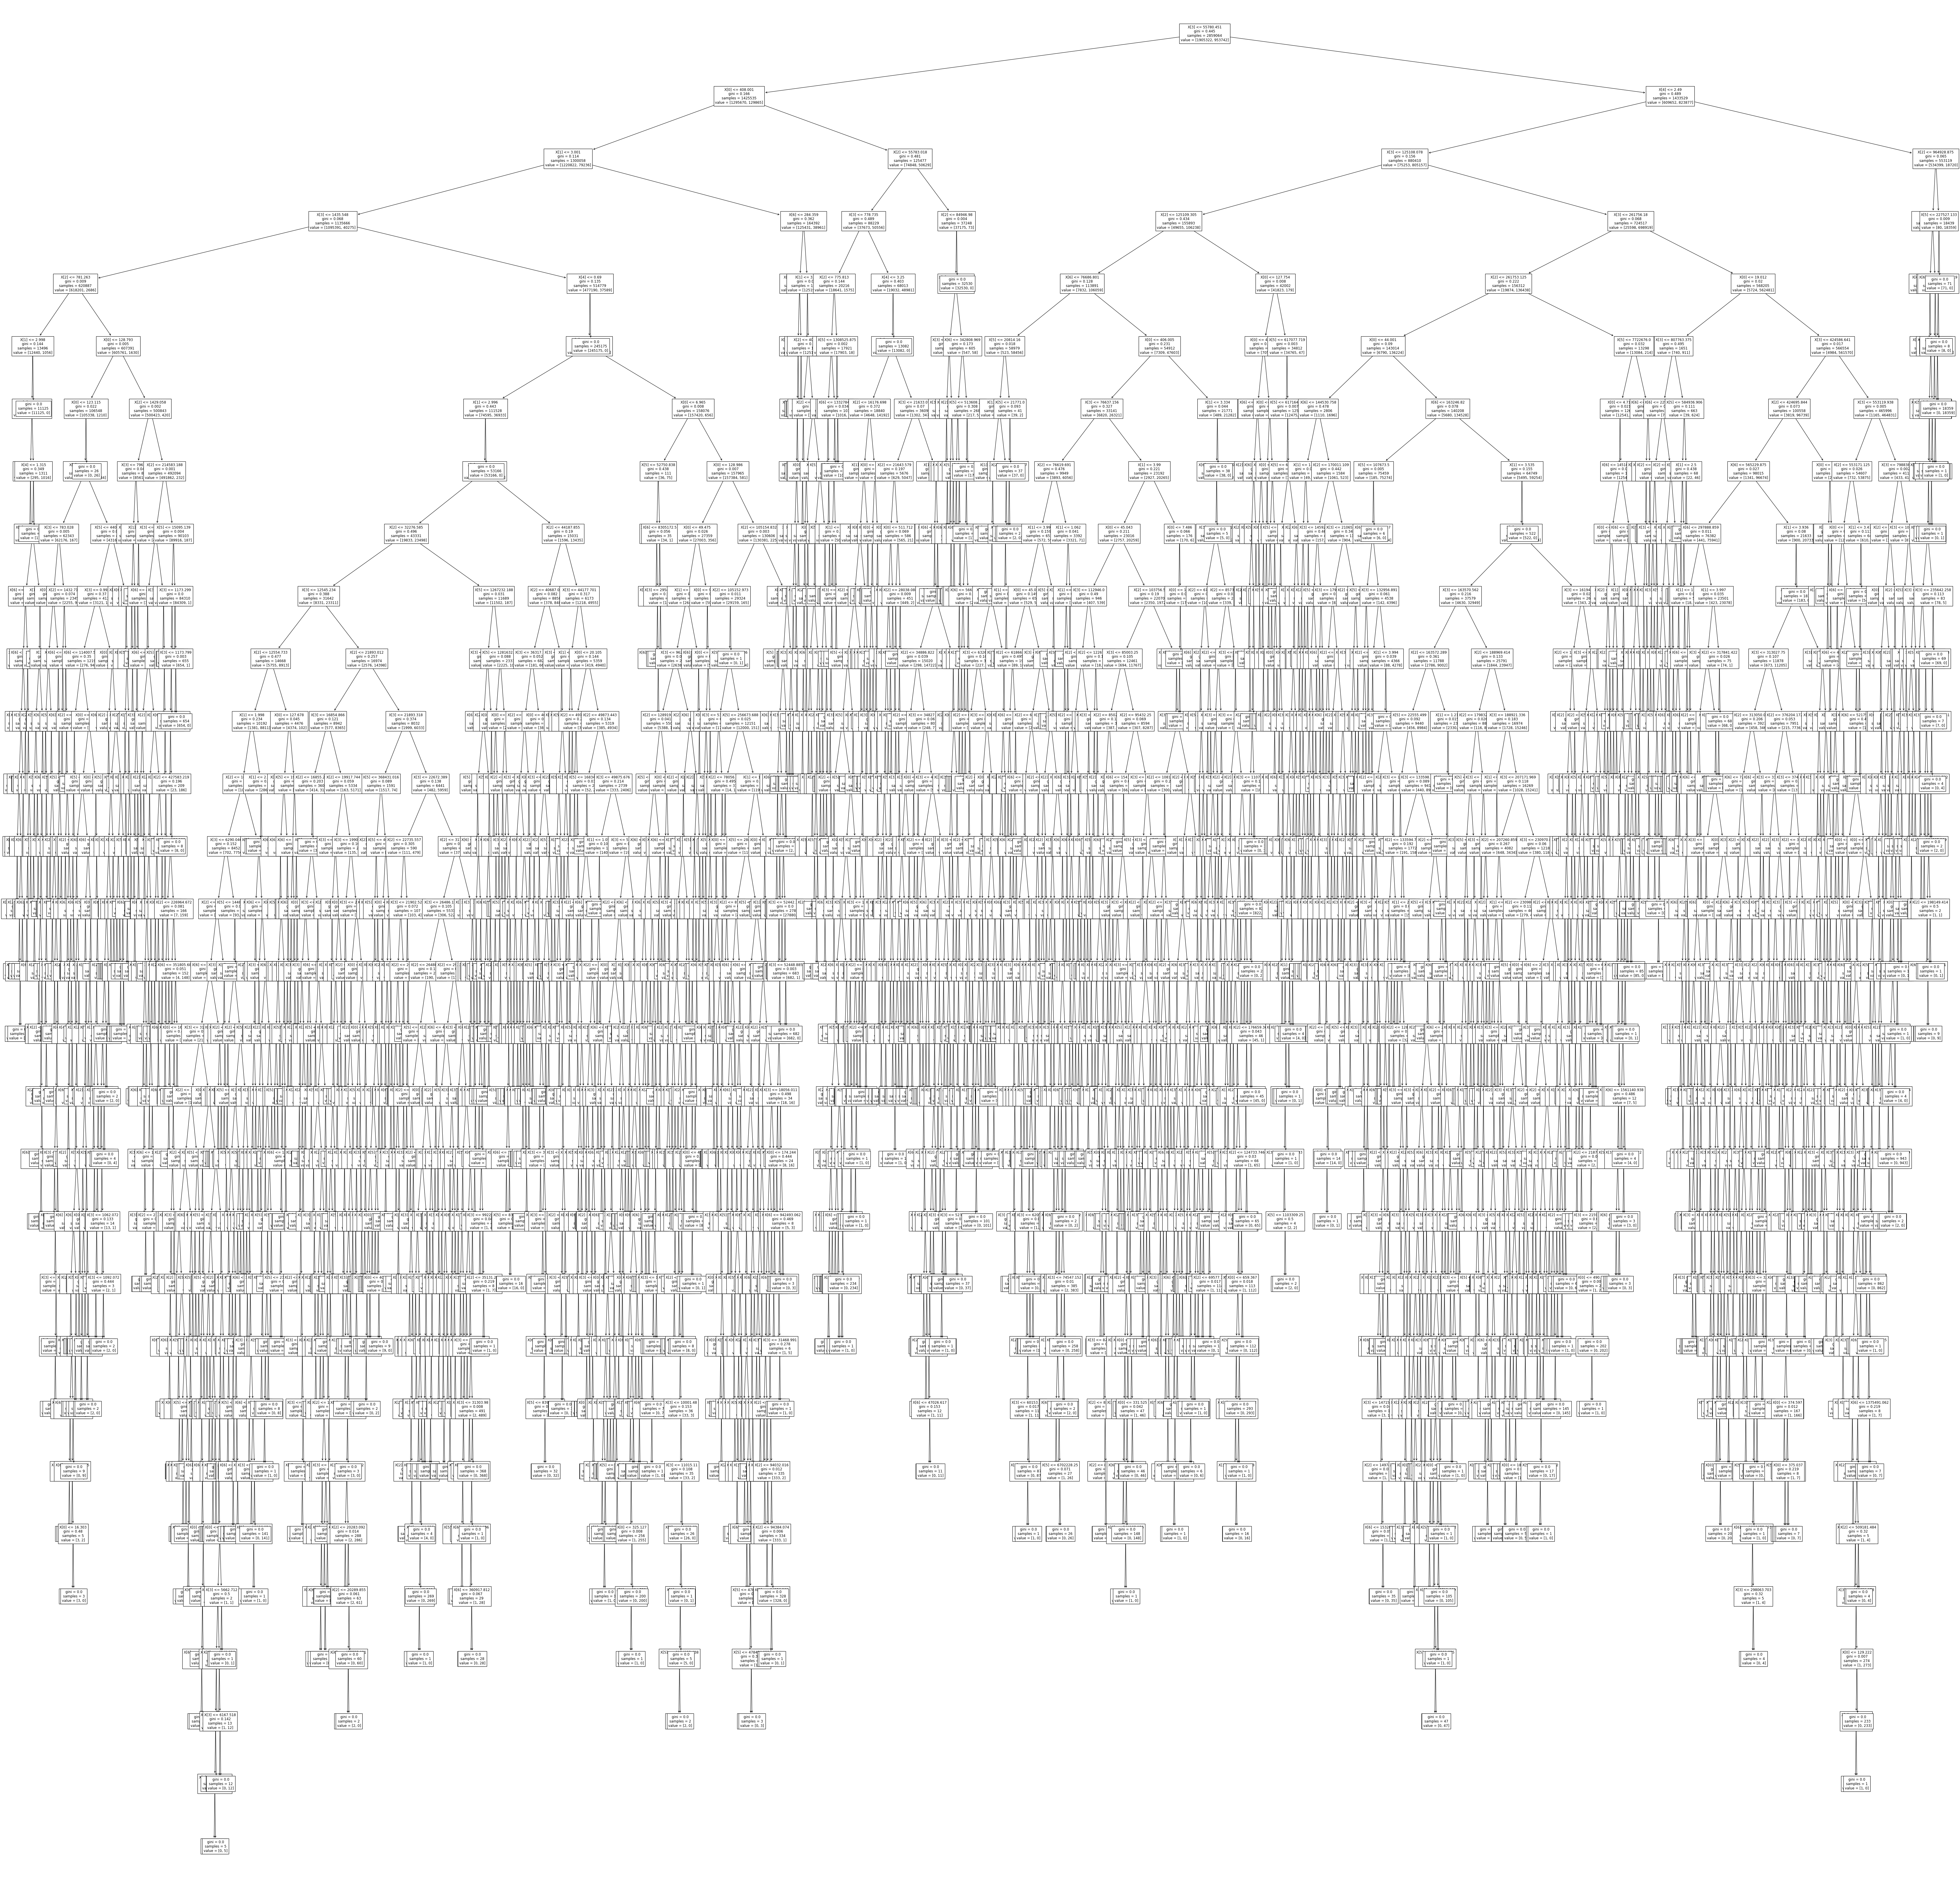

In [29]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize = (100,100))
tree.plot_tree(model3, fontsize = 10)
plt.show()

In [30]:
y_pred3 = model3.predict(x_test)
x3 = accuracy_score(y_test, y_pred3)
x3

0.9991443754075384

In [31]:
matrix3 = confusion_matrix(y_test, y_pred3)
print(matrix1)

[[4241764  206623]
 [ 335908 1886855]]


sns.heatmap(matrix3, annot=True)


bedasarkan hasil perhitungan akurasi model decision tree menghasilkan akurasi tertinggi dibandingkan 2 model sebelumnya. metode ini menghasilkan akurasi sampai 99% yanga artinya sangat baik akurasinya

# KESIMPULAN

In [32]:
d2 = {'Akurasi dengan Logistic regression':[x1],
    'Akurasi dengan Naive Bayes': [x2], 
    'Akurasi dengan Decision Tree': [x3]}
df2 = pd.DataFrame (d2)
df2

Akurasi dengan Logistic regression  Akurasi dengan Naive Bayes  \
0                            0.918675                    0.767757   

   Akurasi dengan Decision Tree  
0                      0.999144

Bedasarkan perbandingan akurasi di atas medel dengan decision tree menghasilkan akurasi yang terbaik diantara kedua model lainnya pada data yang saya gunakan. penyebab dari hasil tersebut tentunya harus dianalisis lebih dalam mengenai teori dibailk ketiga model tersebut

pada tahap data preprocessing saya tidak melakukan pendeteksian outlier dikarenkan menurut pendapat saya, penipuan terkadangng bersal dari akun yang tidak biasa (terdapat transaksi yang berbeda dengan kebanyakan transaksi yang dilakukan akun lainnya). selain itu juga terdapat beberapa data yang 0 lainnya disitu saya mengasumsikan 0 yang dimaksudkan adalah nilai 0 mutlak bukan missing value dikarekan nilai uang bisa 0. dengan hasil akurasi model yang bisa dikatagorikan tinggi maka sudah tidak perlu lagi dilakukan proses lainnya untuk menunjang prediksi model